# Tutorial: Generating Synthetic Baseball Pitch Sequences Using Markov Models

Name: John Hodge

Date: 04/18/24

In this tutorial, we'll explore how to simulate realistic baseball pitch sequences using Markov models. By the end, we will have a synthetic dataset of baseball pitch sequences, including ball and strike counts and pitch outcomes. This dataset can be used to train machine learning models to predict the type of pitch based on the count and pitch history.

## Conceptual Overview
A Markov model is a stochastic model that describes a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. For our baseball simulation, each "state" will be defined by the current count of balls and strikes, and each "event" will be a pitch with a specific outcome (ball, strike, hit).


## Initialize environment

In [24]:
!pip install pandas matplotlib seaborn

In [25]:
import pandas as pd
from typing import Dict, Tuple, List, Union
import random
from matplotlib import pyplot as plt
import seaborn as sns

## Step 1: Define Transition Probabilities

First, define the transition probabilities, which are the core of the Markov model. These probabilities dictate the likelihood of moving from one state (e.g., the count) to another state based on the outcome of a pitch (ball, strike, or hit).

In [26]:
transition_probs = {
    (0, 0): {
        'pitch_probs': {'Fastball': 0.50, 'Slider': 0.25, 'Curveball': 0.15, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.30, 'strike': 0.60, 'hit': 0.10},
            'Slider': {'ball': 0.40, 'strike': 0.50, 'hit': 0.10},
            'Curveball': {'ball': 0.45, 'strike': 0.45, 'hit': 0.10},
            'Changeup': {'ball': 0.35, 'strike': 0.55, 'hit': 0.10}
        }
    },
    (0, 1): {
        'pitch_probs': {'Fastball': 0.45, 'Slider': 0.30, 'Curveball': 0.15, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.32, 'strike': 0.58, 'hit': 0.10},
            'Slider': {'ball': 0.42, 'strike': 0.48, 'hit': 0.10},
            'Curveball': {'ball': 0.47, 'strike': 0.43, 'hit': 0.10},
            'Changeup': {'ball': 0.37, 'strike': 0.53, 'hit': 0.10}
        }
    },
    (0, 2): {
        'pitch_probs': {'Fastball': 0.40, 'Slider': 0.35, 'Curveball': 0.15, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.34, 'strike': 0.56, 'hit': 0.10},
            'Slider': {'ball': 0.44, 'strike': 0.46, 'hit': 0.10},
            'Curveball': {'ball': 0.49, 'strike': 0.41, 'hit': 0.10},
            'Changeup': {'ball': 0.39, 'strike': 0.51, 'hit': 0.10}
        }
    },
    (1, 0): {
        'pitch_probs': {'Fastball': 0.55, 'Slider': 0.20, 'Curveball': 0.15, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.28, 'strike': 0.62, 'hit': 0.10},
            'Slider': {'ball': 0.38, 'strike': 0.52, 'hit': 0.10},
            'Curveball': {'ball': 0.43, 'strike': 0.47, 'hit': 0.10},
            'Changeup': {'ball': 0.33, 'strike': 0.57, 'hit': 0.10}
        }
    },
    (1, 1): {
        'pitch_probs': {'Fastball': 0.50, 'Slider': 0.25, 'Curveball': 0.15, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.30, 'strike': 0.60, 'hit': 0.10},
            'Slider': {'ball': 0.40, 'strike': 0.50, 'hit': 0.10},
            'Curveball': {'ball': 0.45, 'strike': 0.45, 'hit': 0.10},
            'Changeup': {'ball': 0.35, 'strike': 0.55, 'hit': 0.10}
        }
    },
    (1, 2): {
        'pitch_probs': {'Fastball': 0.45, 'Slider': 0.30, 'Curveball': 0.15, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.32, 'strike': 0.58, 'hit': 0.10},
            'Slider': {'ball': 0.42, 'strike': 0.48, 'hit': 0.10},
            'Curveball': {'ball': 0.47, 'strike': 0.43, 'hit': 0.10},
            'Changeup': {'ball': 0.37, 'strike': 0.53, 'hit': 0.10}
        }
    },
    (2, 0): {
        'pitch_probs': {'Fastball': 0.60, 'Slider': 0.20, 'Curveball': 0.10, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.25, 'strike': 0.65, 'hit': 0.10},
            'Slider': {'ball': 0.35, 'strike': 0.55, 'hit': 0.10},
            'Curveball': {'ball': 0.40, 'strike': 0.50, 'hit': 0.10},
            'Changeup': {'ball': 0.30, 'strike': 0.60, 'hit': 0.10}
        }
    },
    (2, 1): {
        'pitch_probs': {'Fastball': 0.55, 'Slider': 0.25, 'Curveball': 0.10, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.28, 'strike': 0.62, 'hit': 0.10},
            'Slider': {'ball': 0.38, 'strike': 0.52, 'hit': 0.10},
            'Curveball': {'ball': 0.43, 'strike': 0.47, 'hit': 0.10},
            'Changeup': {'ball': 0.33, 'strike': 0.57, 'hit': 0.10}
        }
    },
    (2, 2): {
        'pitch_probs': {'Fastball': 0.50, 'Slider': 0.30, 'Curveball': 0.10, 'Changeup': 0.10},
        'outcomes': {
            'Fastball': {'ball': 0.30, 'strike': 0.60, 'hit': 0.10},
            'Slider': {'ball': 0.40, 'strike': 0.50, 'hit': 0.10},
            'Curveball': {'ball': 0.45, 'strike': 0.45, 'hit': 0.10},
            'Changeup': {'ball': 0.35, 'strike': 0.55, 'hit': 0.10}
        }
    },
    (3, 0): {
        'pitch_probs': {'Fastball': 0.80, 'Slider': 0.10, 'Curveball': 0.05, 'Changeup': 0.05},
        'outcomes': {
            'Fastball': {'ball': 0.20, 'strike': 0.70, 'hit': 0.10},
            'Slider': {'ball': 0.30, 'strike': 0.60, 'hit': 0.10},
            'Curveball': {'ball': 0.35, 'strike': 0.55, 'hit': 0.10},
            'Changeup': {'ball': 0.25, 'strike': 0.65, 'hit': 0.10}
        }
    },
    (3, 1): {
        'pitch_probs': {'Fastball': 0.75, 'Slider': 0.15, 'Curveball': 0.05, 'Changeup': 0.05},
        'outcomes': {
            'Fastball': {'ball': 0.25, 'strike': 0.65, 'hit': 0.10},
            'Slider': {'ball': 0.35, 'strike': 0.55, 'hit': 0.10},
            'Curveball': {'ball': 0.40, 'strike': 0.50, 'hit': 0.10},
            'Changeup': {'ball': 0.30, 'strike': 0.60, 'hit': 0.10}
        }
    },
    (3, 2): {
        'pitch_probs': {'Fastball': 0.70, 'Slider': 0.20, 'Curveball': 0.05, 'Changeup': 0.05},
        'outcomes': {
            'Fastball': {'ball': 0.28, 'strike': 0.62, 'hit': 0.10},
            'Slider': {'ball': 0.38, 'strike': 0.52, 'hit': 0.10},
            'Curveball': {'ball': 0.43, 'strike': 0.47, 'hit': 0.10},
            'Changeup': {'ball': 0.33, 'strike': 0.57, 'hit': 0.10}
        }
}
}

## Step 2: Simulate a Pitch

Using the defined probabilities, simulate a pitch based on the current count. This involves selecting a pitch type according to `pitch_probs` and determining the outcome (ball, strike, hit) based on `outcomes`.

```python
def simulate_pitch(self, state):
    pitch_probs = self.transition_probs[state]['pitch_probs']
    pitch_type = random.choices(list(pitch_probs.keys()), weights=pitch_probs.values(), k=1)[0]

    outcome_probs = self.transition_probs[state]['outcomes'][pitch_type]
    outcome = random.choices(list(outcome_probs.keys()), weights=outcome_probs.values(), k=1)[0]

    return pitch_type, outcome
```

## Step 3: Update the Count

After each pitch, update the count of balls and strikes based on the outcome.

```python
def update_count(self, state, outcome):
    balls, strikes = state
    if outcome == 'ball':
        balls += 1
    elif outcome == 'strike':
        strikes += 1

    # Rules to determine next state or end the at-bat
    if balls >= 4:
        return 'walk'
    elif strikes >= 3:
        return 'strikeout'
    else:
        return (balls, strikes)
```

## Step 4: Simulate an At-Bat

Combine the pitch simulation and count updating in a loop to simulate an entire at-bat.

```python
def simulate_at_bat(self):
    state = (0, 0)
    sequence = []

    while True:
        pitch_type, outcome = self.simulate_pitch(state)
        sequence.append((state, pitch_type, outcome))
        new_state = self.update_count(state, outcome)
        if isinstance(new_state, tuple):
            state = new_state
        else:
            sequence.append(new_state)
            break

    return sequence
```

## Step 5: Combine components into a baseball pitch simulator class

In [27]:
class BaseballPitchSimulator:
    def __init__(self, transition_probs: Dict):
        self.states = [(balls, strikes) for balls in range(4) for strikes in range(3)]
        self.pitch_types = ['Fastball', 'Slider', 'Curveball', 'Changeup']
        self.transition_probs = transition_probs
        self.pitch_count = 0

    def simulate_pitch(self, current_state: Tuple[int, int]) -> Tuple[str, str]:
        """Simulates a pitch and determines its outcome based on probabilistic pitch type selection."""
        pitch_type_probs = self.transition_probs[current_state]['pitch_probs']
        pitch_types = list(pitch_type_probs.keys())
        pitch_probabilities = list(pitch_type_probs.values())
        pitch_type = random.choices(pitch_types, weights=pitch_probabilities, k=1)[0]
        probabilities = self.transition_probs[current_state]['outcomes'][pitch_type]
        self.pitch_count += 1
        fatigue_factor = 1  # Static fatigue factor, modify if needed
        outcome = random.choices(['ball', 'strike', 'hit'],
                                weights=[probabilities['ball'] * fatigue_factor,
                                          probabilities['strike'] / fatigue_factor,
                                          probabilities['hit']],
                                k=1)[0]
        return pitch_type, outcome


    def update_count(self, current_state, outcome):
        balls, strikes = current_state
        if outcome == 'ball':
            balls += 1
            if balls == 4:
                return 'walk'
        elif outcome == 'strike':
            strikes += 1
            if strikes == 3:
                return 'strikeout'
        elif outcome == 'hit':
            return 'hit'

        return (balls, strikes) if (balls < 4 and strikes < 3) else None

    def simulate_at_bat(self):
        state = (0, 0)
        sequence = []

        while True:
            pitch_type, outcome = self.simulate_pitch(state)
            sequence.append((state, pitch_type, outcome))
            new_state = self.update_count(state, outcome)
            if isinstance(new_state, tuple):
                state = new_state
            else:
                sequence.append(new_state)
                break

        return sequence

In [28]:
# Example usage:
simulator = BaseballPitchSimulator(transition_probs)
for i in range(5):
    print(i, simulator.simulate_at_bat())

0 [((0, 0), 'Changeup', 'ball'), ((1, 0), 'Fastball', 'strike'), ((1, 1), 'Fastball', 'strike'), ((1, 2), 'Slider', 'ball'), ((2, 2), 'Fastball', 'strike'), 'strikeout']
1 [((0, 0), 'Fastball', 'ball'), ((1, 0), 'Curveball', 'hit'), 'hit']
2 [((0, 0), 'Fastball', 'strike'), ((0, 1), 'Slider', 'strike'), ((0, 2), 'Changeup', 'ball'), ((1, 2), 'Curveball', 'strike'), 'strikeout']
3 [((0, 0), 'Fastball', 'strike'), ((0, 1), 'Changeup', 'strike'), ((0, 2), 'Fastball', 'ball'), ((1, 2), 'Slider', 'strike'), 'strikeout']
4 [((0, 0), 'Fastball', 'hit'), 'hit']


## Step 6: Generate Dataset

Simulate multiple at-bats to generate a dataset.

In [29]:
def generate_dataset(num_at_bats):
    simulator = BaseballPitchSimulator(transition_probs)
    data = []

    for _ in range(num_at_bats):
        at_bat = simulator.simulate_at_bat()
        for state, pitch_type, outcome in at_bat[:-1]:  # Exclude the final result like 'walk' or 'strikeout'
            balls, strikes = state
            data.append([balls, strikes, pitch_type, outcome])

    df = pd.DataFrame(data, columns=['Balls', 'Strikes', 'PitchType', 'Outcome'])
    return df

In [30]:
# Generate the dataset
dataset = generate_dataset(100000)

# Save to CSV (for ML model training)
dataset.to_csv('baseball_pitch_data.csv', index=False)

## View Data

In [31]:
dataset

,Balls,Strikes,PitchType,Outcome
0,0,0,Fastball,strike
1,0,1,Changeup,ball
2,1,1,Slider,hit
3,0,0,Fastball,strike
4,0,1,Changeup,strike
...,...,...,...,...
378195,1,0,Fastball,strike
378196,1,1,Slider,strike
378197,1,2,Fastball,ball
378198,2,2,Fastball,ball


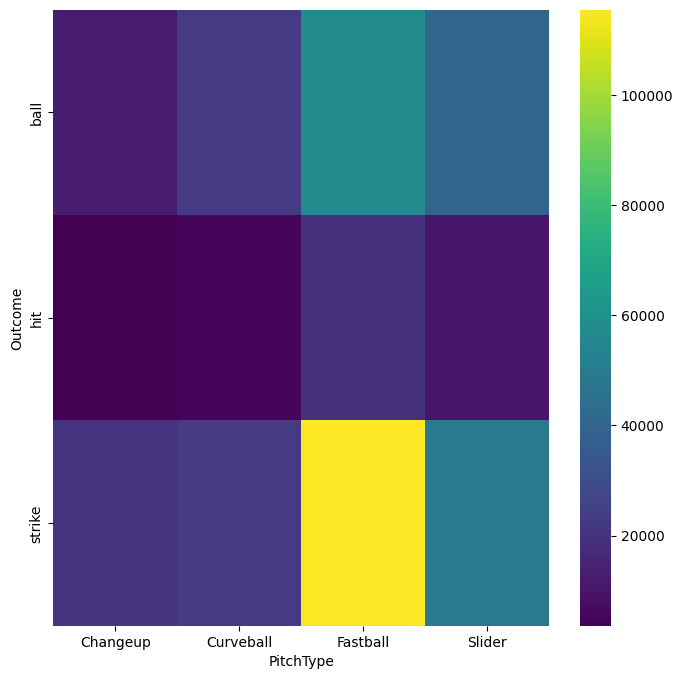

In [32]:
# @title PitchType vs Outcome

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Outcome'].value_counts()
    for x_label, grp in dataset.groupby('PitchType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PitchType')
_ = plt.ylabel('Outcome')

### Violin Plot

A violin plot plays a similar role as a box-and-whisker plot. It shows the distribution of data points after grouping by one (or more) variables. Unlike a box plot, each violin is drawn using a kernel density estimate of the underlying distribution.

More information: https://seaborn.pydata.org/generated/seaborn.violinplot.html

<ipython-input-33-fdee93e4505f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dataset, x='Balls', y='PitchType', inner='box', palette='Dark2')


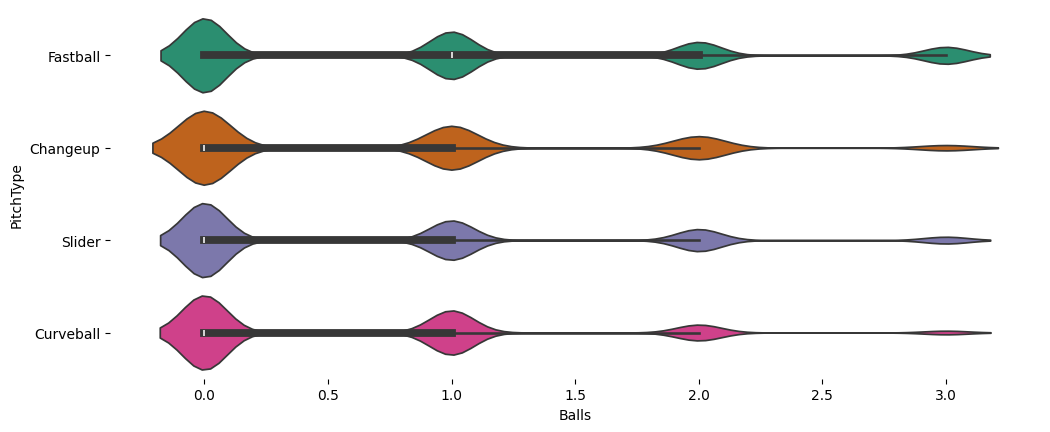

In [33]:
# Violine plot of PitchType vs Balls
figsize = (12, 1.2 * len(dataset['PitchType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='Balls', y='PitchType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Conclusion

This tutorial demonstrates how to use Markov models to generate realistic baseball pitch sequences. The resulting dataset provides a detailed sequence of pitches, including pitch types and outcomes, based on the count during the at-bat. This synthetic dataset can be used for training predictive models in sports analytics, particularly for predicting the type of pitch based on historical data.